<h2>Описание задачи</h2>

В рамках данной задачи я хочу обучить модель предсказывать отменен или не отменет авиарейс.
Передо мной стоит задача классификации статуса авирейса (отменен или нет)

In [72]:
# Copyright Loseava 2025

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h3>1. Прочитаю данные<h3>

In [ ]:
f = pd.read_csv('../Combined_Flights_2019.csv')
a = pd.read_csv('../Airlines.csv')


**Наши данные**
1. FlightDate - Дата рейса в формате год-месяц-день
2. Airline - Название авиакомпании, выполняющей рейс
3. Origin - Код аэропорта вылета
4. Dest - Код аэропорта назначения
5. Cancelled - Флаг отмены рейса
6. Diverted - Флаг перенаправления рейса в другой аэропорт
7. CRSDepTime - Плановое время вылета в формате часыминуты
8. DepTime - Фактическое время вылета
9. DepDelayMinutes - Задержка вылета в минутах (для рейсов, вылетевших рано, значение равно 0)
10. DepDelay - Задержка вылета в минутах (отрицательные значения означают ранний вылет)
11. ArrTime - Фактическое время прилета
12. ArrDelayMinutes - Задержка прилета в минутах (для рейсов, прилетевших рано, значение равно 0)
13. AirTime - Время в полете в минутах (от взлета до посадки)
14. CRSElapsedTime - Плановое общее время рейса в минутах
15. ActualElapsedTime - Фактическое общее время рейса в минутах
16. Distance - Расстояние между аэропортами в милях
17. Year - Год выполнения рейса
18. Quarter - Квартал года
19. Month - Месяц выполнения рейса
20. DayofMonth - Число месяца
21. DayOfWeek - День недели (1-7)
22. Marketing_Airline_Network - Код авиакомпании, осуществляющей продажу билетов
23. Operated_or_Branded_Code_Share_Partners - Код авиакомпании или альянса, выполняющего рейс под общим брендом
24. DOT_ID_Marketing_Airline - Уникальный идентификатор маркетинговой авиакомпании (Министерство транспорта США)
25. IATA_Code_Marketing_Airline - Код IATA маркетинговой авиакомпании (может повторяться у разных перевозчиков)
26. Flight_Number_Marketing_Airline - Номер рейса маркетинговой авиакомпании
27. Operating_Airline - Код авиакомпании, непосредственно выполняющей рейс
28. DOT_ID_Operating_Airline - Уникальный идентификатор оператора рейса (Министерство транспорта США)
29. IATA_Code_Operating_Airline - Код IATA оператора рейса
30. Tail_Number - Бортовой номер самолета
31. Flight_Number_Operating_Airline - Номер рейса оператора
32. OriginAirportID - Уникальный идентификатор аэропорта вылета
33. OriginAirportSeqID - Последовательный идентификатор аэропорта вылета для сортировки
34. OriginCityMarketID - Идентификатор города/рынка аэропорта вылета
35. OriginCityName - Название города аэропорта вылета
36. OriginState - Двухбуквенный код штата вылета
37. OriginStateFips - Числовой код штата вылета (стандарт FIPS)
38. OriginStateName - Полное название штата вылета
39. OriginWac - Координаты аэропорта вылета (система WAC)
40. DestAirportID - Уникальный идентификатор аэропорта назначения
41. DestAirportSeqID - Последовательный идентификатор аэропорта назначения для сортировки
42. DestCityMarketID - Идентификатор города/рынка аэропорта назначения
43. DestCityName - Название города аэропорта назначения
44. DestState - Двухбуквенный код штата назначения
45. DestStateFips - Числовой код штата назначения (стандарт FIPS)
46. DestStateName - Полное название штата назначения
47. DestWac - Координаты аэропорта назначения (система WAC)
48. DepDel15 - Индикатор задержки вылета более 15 минут
49. DepartureDelayGroups - Группы задержки вылета (15-минутные интервалы)
50. DepTimeBlk - Временной блок вылета (часовые интервалы)
51. TaxiOut - Время руления от стоянки до взлета в минутах
52. WheelsOff - Время отрыва от взлетной полосы
53. WheelsOn - Время касания посадочной полосы
54. TaxiIn - Время руления от посадки до стоянки в минутах
55. CRSArrTime - Плановое время прилета
56. ArrDelay - Задержка прилета в минутах (отрицательные значения означают ранний прилет)
57. ArrDel15 - Индикатор задержки прилета более 15 минут
58. ArrivalDelayGroups - Группы задержки прилета (15-минутные интервалы)
59. ArrTimeBlk - Временной блок прилета (часовые интервалы)
60. DistanceGroup - Группа расстояния (250-мильные интервалы)
61. DivAirportLandings - Количество посадок при перенаправлении рейса

In [74]:
f.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2019-04-01,Envoy Air,LIT,ORD,False,False,1212,1209.0,0.0,-3.0,...,1219.0,1342.0,8.0,1405,-15.0,0.0,-1.0,1400-1459,3,0
1,2019-04-02,Envoy Air,LIT,ORD,False,False,1212,1200.0,0.0,-12.0,...,1210.0,1339.0,9.0,1405,-17.0,0.0,-2.0,1400-1459,3,0
2,2019-04-03,Envoy Air,LIT,ORD,False,False,1212,1203.0,0.0,-9.0,...,1214.0,1336.0,6.0,1405,-23.0,0.0,-2.0,1400-1459,3,0
3,2019-04-04,Envoy Air,LIT,ORD,False,False,1212,1435.0,143.0,143.0,...,1452.0,1615.0,6.0,1405,136.0,1.0,9.0,1400-1459,3,0
4,2019-04-05,Envoy Air,LIT,ORD,False,False,1212,1216.0,4.0,4.0,...,1234.0,1357.0,13.0,1405,5.0,0.0,0.0,1400-1459,3,0


<h2> 2.Проведу разведочный анализ данных (EDA)</h2>

   - Визуализирую данные (зависимость числовых значений, с помощью ковариационной матрицы)
   - и вычислю основные характеристики (среднее, разброс, корреляционную матрицу и т.д.)

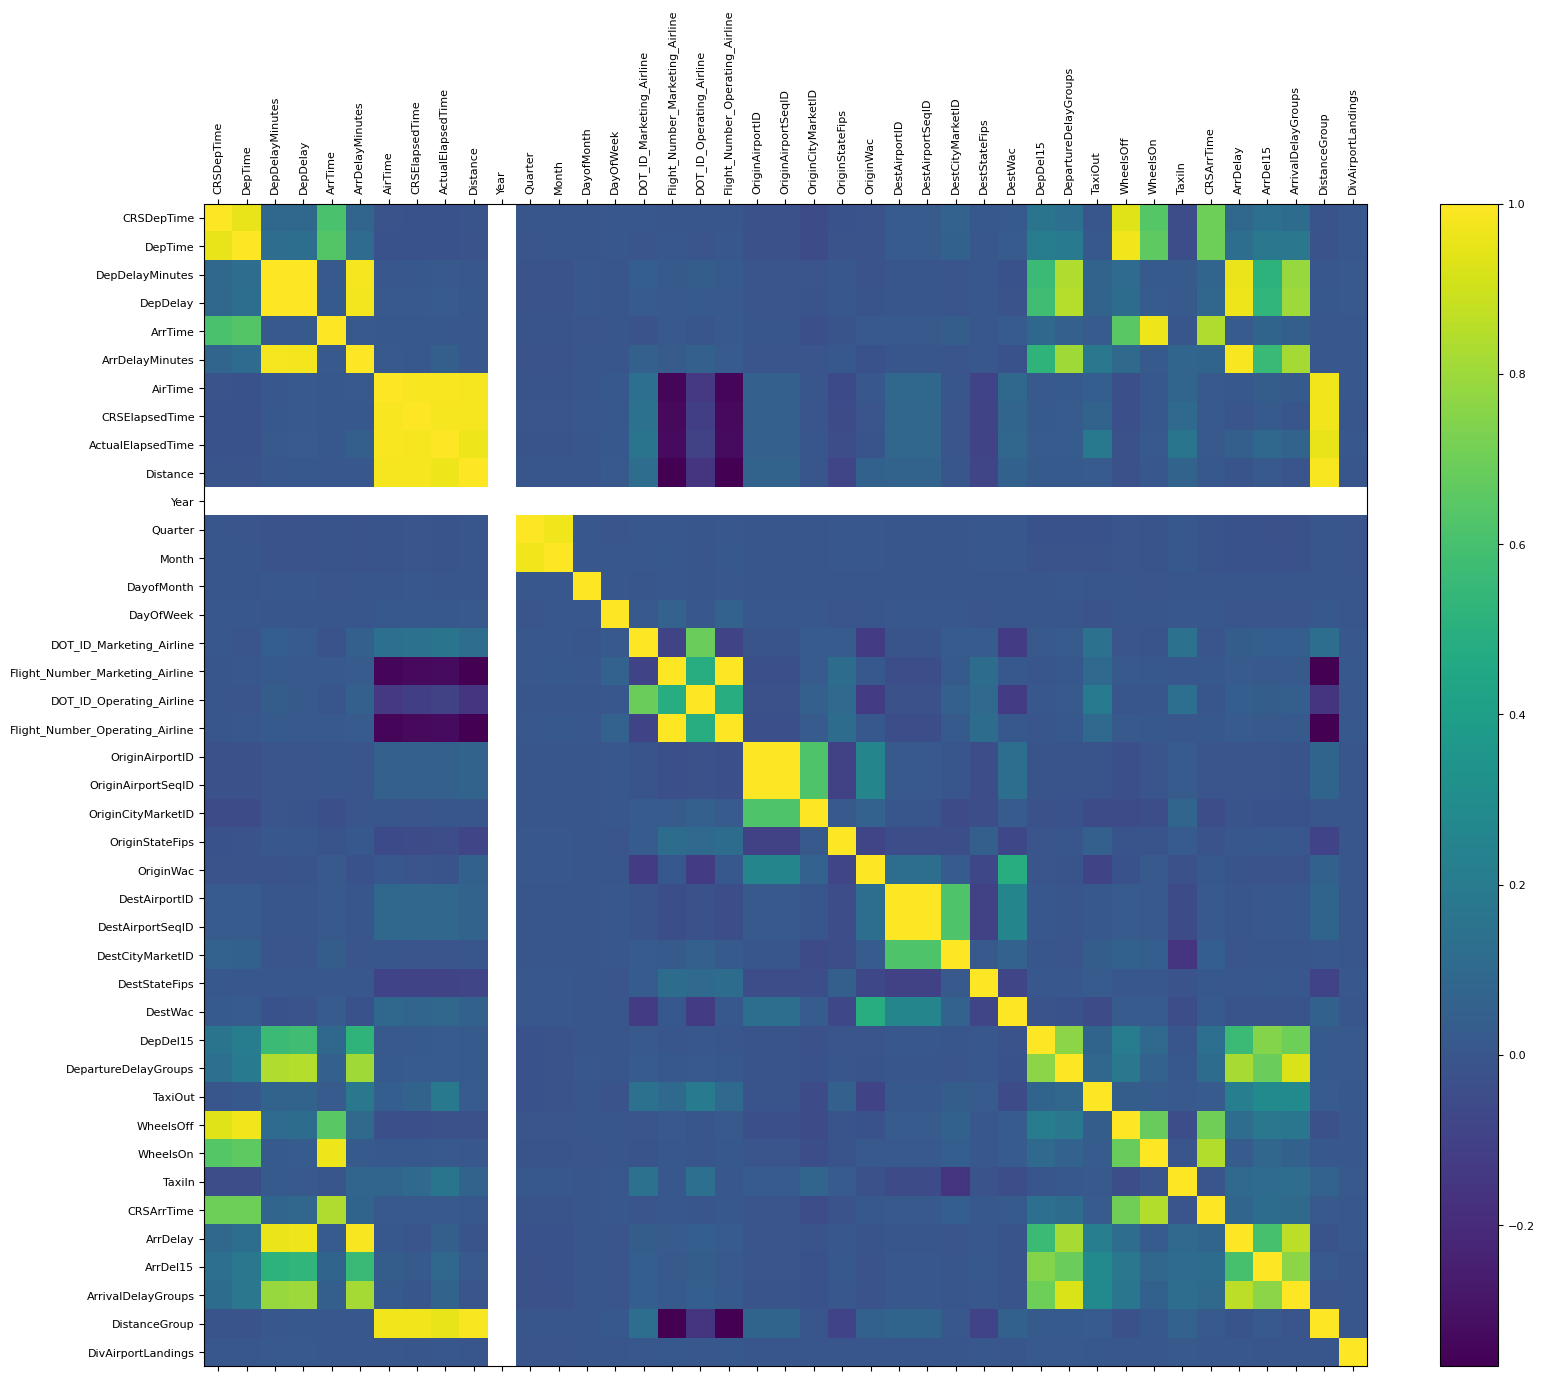

In [75]:
num=f.select_dtypes(include=["int", "float"]).columns.to_list()
corr_mtx = f[num].corr()
fig = plt.figure(figsize=(19, 15))
plt.matshow(corr_mtx, fignum=fig.number)
plt.xticks(range(len(num)), num, fontsize=8, rotation=90)
plt.yticks(range(len(num)), num, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
pass

<h2>Исключу коррелированные переменные</h2>

Просмотрев и проанализировав признаки, я решила уменьшить их количество так как существуют неинтересные для данной задачи или дублирующие (с высокой кореляцией)
Признаки с высокой корреляцией - плохие, так усложняют модель, и не дают новой информации. Поэтому их следует удалять.
В итоге оставляю следующие 24 столбца, среди которых 'Cancelled' определяет класс (отменен рейс или нет):

In [76]:
f2=f[['Cancelled','Diverted', 'CRSDepTime', 'DepDelay', 'CRSElapsedTime', 'Month','DayofMonth', 'DayOfWeek', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'Operating_Airline', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'OriginCityName', 'OriginState', 'OriginWac', 'DestAirportID','DestCityName', 'DestState', 'DestWac', 'TaxiOut','TaxiIn', 'CRSArrTime', 'DivAirportLandings']]

In [77]:
f2.head()

,Cancelled,Diverted,CRSDepTime,DepDelay,CRSElapsedTime,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,...,OriginState,OriginWac,DestAirportID,DestCityName,DestState,DestWac,TaxiOut,TaxiIn,CRSArrTime,DivAirportLandings
0,False,False,1212,-3.0,113.0,4,1,1,AA,AA_CODESHARE,...,AR,71,13930,"Chicago, IL",IL,41,10.0,8.0,1405,0
1,False,False,1212,-12.0,113.0,4,2,2,AA,AA_CODESHARE,...,AR,71,13930,"Chicago, IL",IL,41,10.0,9.0,1405,0
2,False,False,1212,-9.0,113.0,4,3,3,AA,AA_CODESHARE,...,AR,71,13930,"Chicago, IL",IL,41,11.0,6.0,1405,0
3,False,False,1212,143.0,113.0,4,4,4,AA,AA_CODESHARE,...,AR,71,13930,"Chicago, IL",IL,41,17.0,6.0,1405,0
4,False,False,1212,4.0,113.0,4,5,5,AA,AA_CODESHARE,...,AR,71,13930,"Chicago, IL",IL,41,18.0,13.0,1405,0


Теперь имеем 24 признака
14 признаков типа int64, среди которых 13 числовых(с ними будем работать как с числами) и 2 категоральных: OriginAirportID и DestAirportID

Так же есть время CRSDepTime, CRSArrTime, переведем в минуту за день.

In [ ]:
num_pr=['CRSDepTime', 'DepDelay', 'CRSElapsedTime', 'Month', 'DayofMonth',
 'DayOfWeek', 'Flight_Number_Operating_Airline', 'OriginWac', 'DestWac',
 'TaxiOut', 'TaxiIn', 'CRSArrTime', 'DivAirportLandings']

f2[["OriginAirportID", "DestAirportID"]] = f2[["OriginAirportID", "DestAirportID"]].apply(lambda x: x // 100 * 60 + x % 100 )

f2[num_pr].describe().drop(index=["count"])

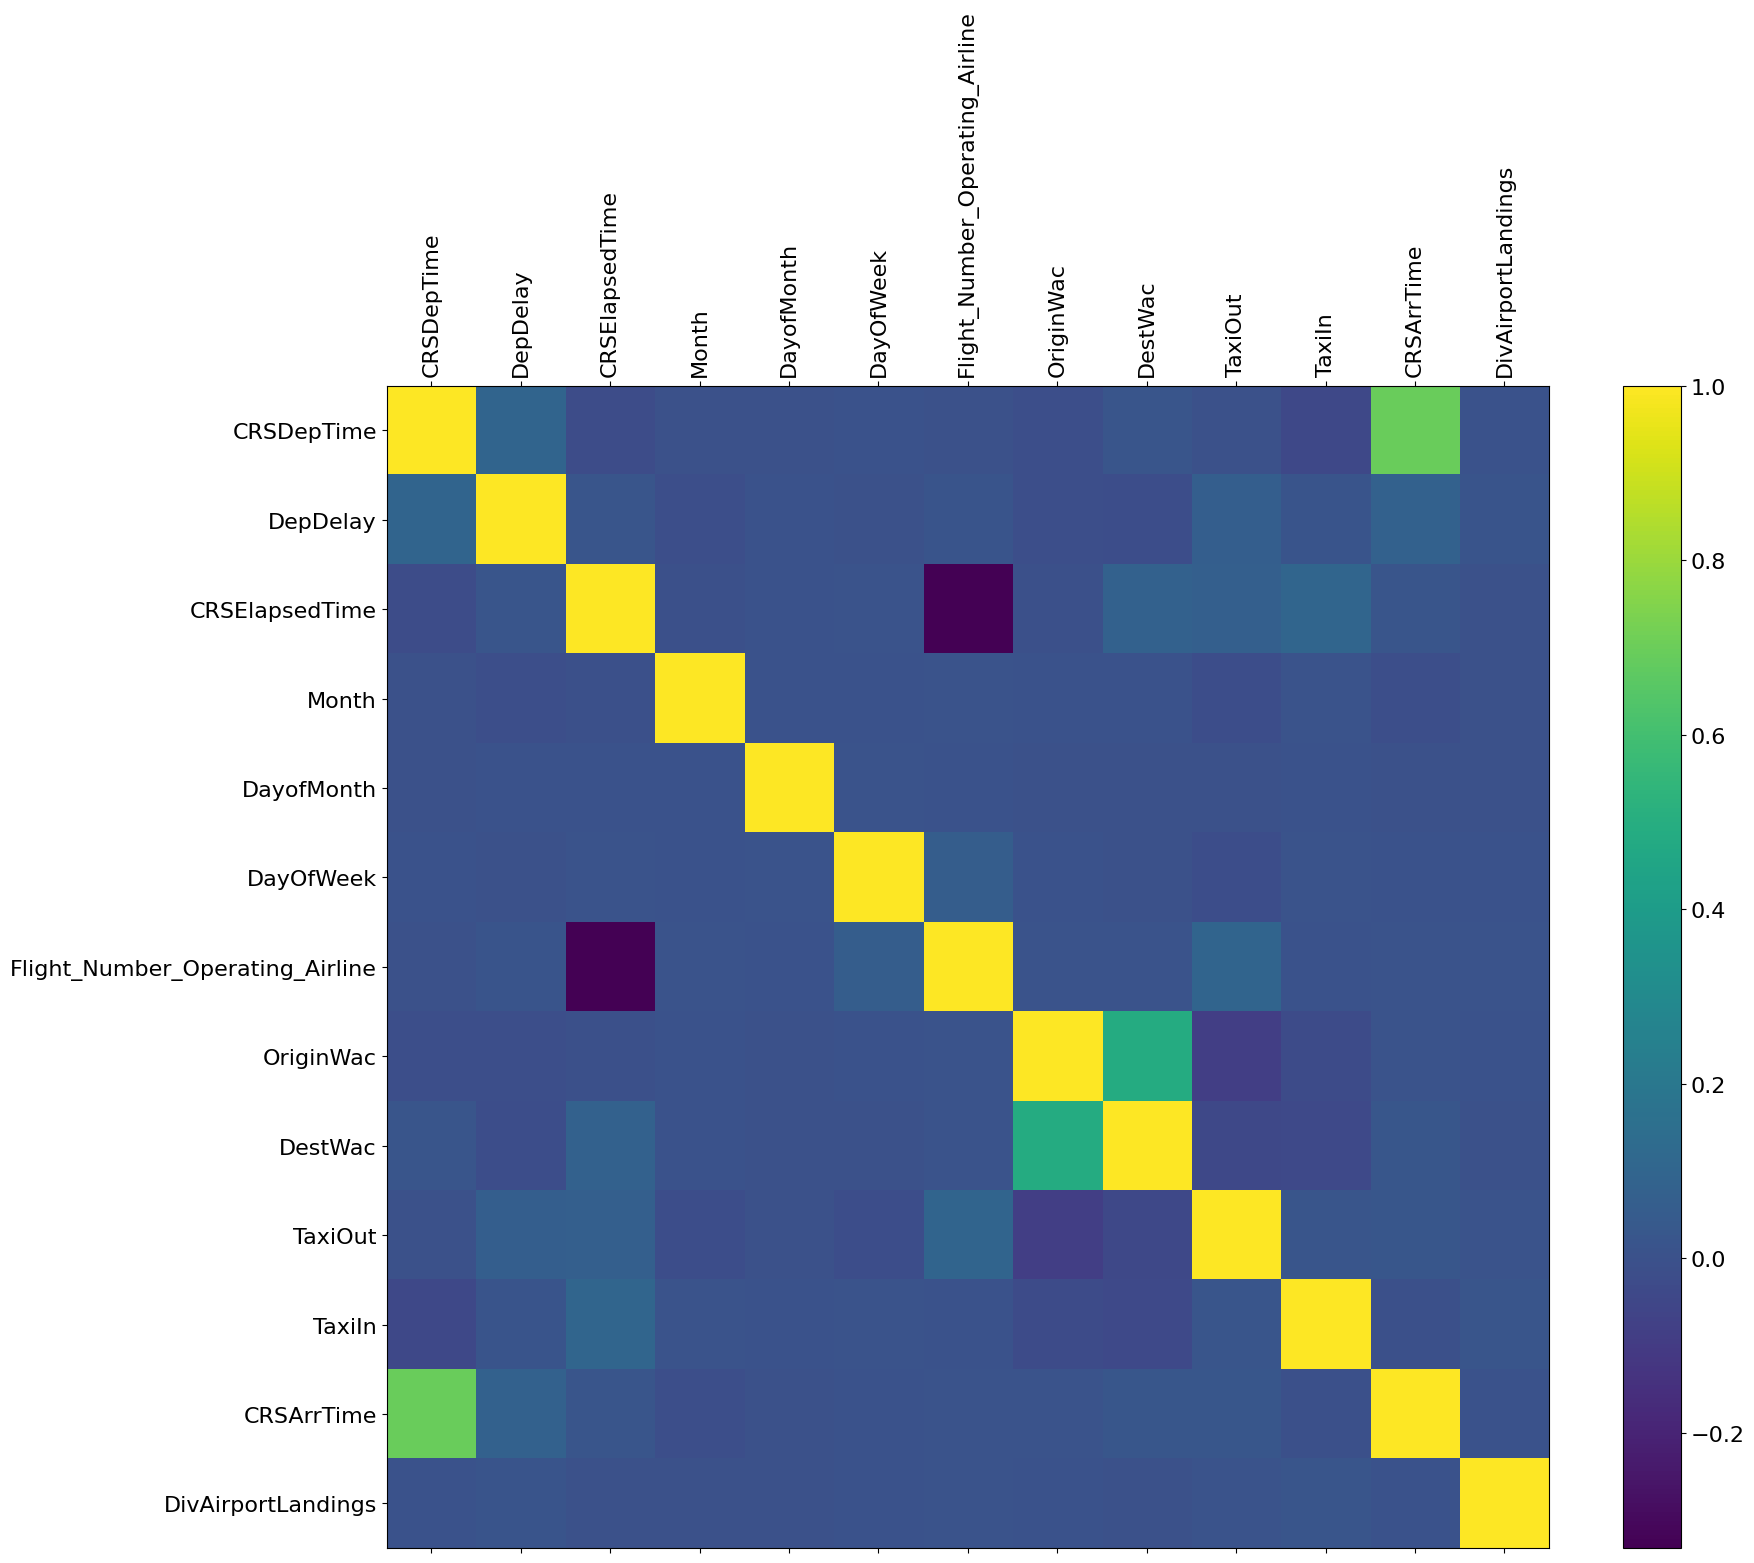

In [ ]:
corr_mtx = f2[num_pr].corr()
fig2 = plt.figure(figsize=(19, 15))
plt.matshow(corr_mtx, fignum=fig2.number)
plt.xticks(range(len(num_pr)), num_pr, fontsize=16, rotation=90)
plt.yticks(range(len(num_pr)), num_pr, fontsize=16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
pass

По кореляционной матрице видно, что признаки имеют низкую связанность, значит мы убрали все дублирующие признаки.

<h2>3. Обрабатываю пропущенные значения<h2>

In [80]:
f2.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8091684 entries, 0 to 8091683
Data columns (total 24 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   Cancelled                                8091684 non-null  bool   
 1   Diverted                                 8091684 non-null  bool   
 2   CRSDepTime                               8091684 non-null  int64  
 3   DepDelay                                 7943766 non-null  float64
 4   CRSElapsedTime                           8091674 non-null  float64
 5   Month                                    8091684 non-null  int64  
 6   DayofMonth                               8091684 non-null  int64  
 7   DayOfWeek                                8091684 non-null  int64  
 8   Marketing_Airline_Network                8091684 non-null  object 
 9   Operated_or_Branded_Code_Share_Partners  8091684 non-null  object 
 10  Operating_Airline 

Видно что значения пропущены в столбцах DepDelay, CRSElapsedTime, TaxiOut, TaxiIny.
Заполним их медианными значениями.

In [81]:
have_missing_value = ["DepDelay", "CRSElapsedTime", "TaxiOut", "TaxiIn"]
rezult = { col: f2[col].median() for col in have_missing_value }
f2 = f2.fillna(rezult)
rezult

{'DepDelay': -2.0, 'CRSElapsedTime': 120.0, 'TaxiOut': 15.0, 'TaxiIn': 6.0}

Теперь нет пустых значений.

In [82]:
f2.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8091684 entries, 0 to 8091683
Data columns (total 24 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   Cancelled                                8091684 non-null  bool   
 1   Diverted                                 8091684 non-null  bool   
 2   CRSDepTime                               8091684 non-null  int64  
 3   DepDelay                                 8091684 non-null  float64
 4   CRSElapsedTime                           8091684 non-null  float64
 5   Month                                    8091684 non-null  int64  
 6   DayofMonth                               8091684 non-null  int64  
 7   DayOfWeek                                8091684 non-null  int64  
 8   Marketing_Airline_Network                8091684 non-null  object 
 9   Operated_or_Branded_Code_Share_Partners  8091684 non-null  object 
 10  Operating_Airline 

<h2>4. Обрабатываю категориальные признаки<h2>

In [83]:
cat_ft = f2.select_dtypes(exclude=["int", "float", "bool"]).columns.to_list()
f2[cat_ft].nunique()

Marketing_Airline_Network                   10
Operated_or_Branded_Code_Share_Partners     15
Operating_Airline                           26
OriginCityName                             365
OriginState                                 52
DestCityName                               365
DestState                                   52
dtype: int64

In [ ]:

from sklearn.preprocessing import LabelEncoder
import pandas as pd

cat_columns = f2.select_dtypes(exclude=["int", "float"]).columns.tolist()
f3 = f2
ohe = LabelEncoder()
for col in cat_columns:
    encoded_array = ohe.fit_transform(f2[col])
    f3[col] = encoded_array

<h2>Проверяю сбалонсированы ли классы. (11)<h2>

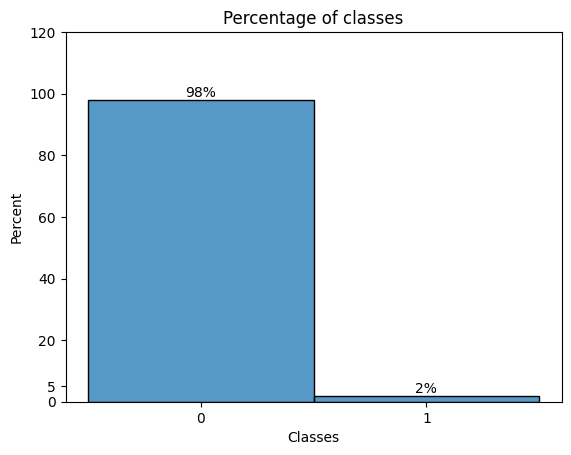

In [85]:
import seaborn as sn

y = f3["Cancelled"]
X = features = f3.drop(columns="Cancelled")

gist = sn.histplot(y, bins=len(y.unique()), discrete=True, 
                  stat="percent")
gist.set_xticks(np.arange(len(y.unique())))
gist.set_yticks([*gist.get_yticks(), 5])
for p in gist.patches:
    text = f"{round(p.get_height())}%"
    gist.text(p.get_x() + p.get_width() / 2., p.get_height(), text, fontsize=10, ha='center', va='bottom')
    gist.set_xlabel("Classes")
    plt.title("Percentage of classes")
pass

Классы оооочень не сбалансированы, что соответвует реальности. Количество отмененных рейсов намного меньше.
Уменьшу несбалонисованность классов путем уменьшения выборки (все равно очень много примеров)

In [ ]:
from sklearn.utils import resample

# Разделяем данные по классам
df_majority = f3[f3['Cancelled'] == 0]
df_minority = f3[f3['Cancelled'] == 1]

# уменьшаю несбалонсированность классов
df_majority_undersampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

# Объединяем
f3_balanced = pd.concat([df_majority_undersampled, df_minority])

# Подготовка данных
y = f3_balanced["Cancelled"]
X = f3_balanced.drop(columns="Cancelled")

<h2>6.Разделю данные на обучающую и тестовую выборку<h2>

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y,
    shuffle=True, random_state=2024
)

<h2>Обучение и тестирование моделей<h2>

Напишу общую функцию, так как обучать модель и выводить результаты придется трижды

In [ ]:

from sklearn.metrics import (
    f1_score, roc_auc_score, precision_score, recall_score,
    RocCurveDisplay, ConfusionMatrixDisplay
)
from sklearn.model_selection import GridSearchCV


def my_metrics(model, x, y):
    y_predict, y_predict_proba = evaluate(model, x)
    result = {
        "precision": precision_score(y, y_predict),
        "recall": recall_score(y, y_predict),
        "f1": f1_score(y, y_predict),
        "roc_auc": roc_auc_score(y, y_predict_proba)
    }
    return result

def train(model, param, x_train, y_train):
    grid_search = GridSearchCV(model, param, scoring=my_metrics, refit="f1")
    grid_search.fit(x_train, y_train)
    return grid_search

def evaluate(model, x):
    y_predict = model.predict(x)
    y_predict_proba = model.predict_proba(x)[:, 1]
    return y_predict, y_predict_proba


def report(grid_search, x_test, y_test):
    #преобразуем объект grid_search в DataFrame
    data_frame = pd.DataFrame(grid_search.cv_results_)
    columns = []
    for col in data_frame:
        if col.startswith(("param_", "mean_", "rank_")):
            columns.append(col)
    data_frame = data_frame[columns]
    
    #оценим лучшую модель на тестовых данных
    model = grid_search.best_estimator_
    test_results = my_metrics(model, x_test, y_test)
    test_results = pd.DataFrame({key: [value] for key, value in test_results.items()})
    y_predict, y_predict_proba = evaluate(model, x_test)
    
    print("TRAIN RESULTS")
    display(data_frame)
    print("TEST RESULTS")
    display(test_results)
    
    #создаем матрицу ошибок
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
    disp.ax_.set_title("Confusion Matrix")
    #рисуем график
    plt.figure(figsize=(15, 15))
    RocCurveDisplay.from_predictions(y_test, y_predict_proba)
    plt.title("Roc Curve")

        
    return data_frame, test_results

<h3>7. Запускаю классификатор ближайших соседей</h3>

In [89]:
from sklearn.neighbors import KNeighborsClassifier

param = {
    "n_neighbors": np.arange(1, 10, 2)
}
knn_grid_search = train(KNeighborsClassifier(n_jobs=-1), param, X_train, y_train)


8. Подобрираю оптимальное значение количествава ближайших соседей и 
9. Вычисляю ошибки на обучающей и тестовой выборках. 

TRAIN RESULTS


,mean_fit_time,mean_score_time,param_n_neighbors,mean_test_precision,rank_test_precision,mean_test_recall,rank_test_recall,mean_test_f1,rank_test_f1,mean_test_roc_auc,rank_test_roc_auc
0,0.101392,31.884796,1,0.654105,1,0.748721,1,0.698219,1,0.676391,5
1,0.113794,31.431879,3,0.636400,2,0.720690,2,0.675923,2,0.702992,1
2,0.094466,30.552951,5,0.629782,3,0.703156,3,0.664446,3,0.699378,2
3,0.095280,29.223112,7,0.626510,4,0.690512,4,0.656952,4,0.694824,3
4,0.088704,28.988126,9,0.624753,5,0.683686,5,0.652891,5,0.690302,4


TEST RESULTS


,precision,recall,f1,roc_auc
0,0.667233,0.766322,0.713353,0.692069


{'n_neighbors': 1}


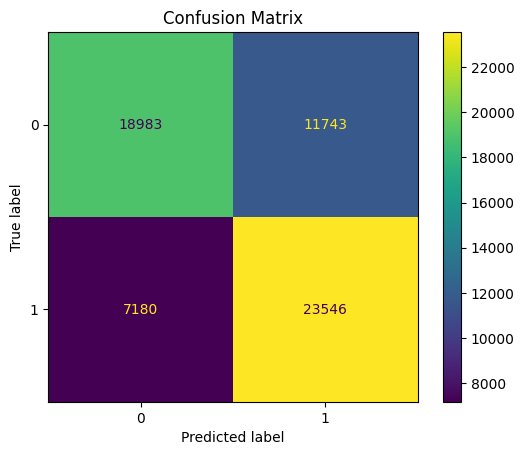

<Figure size 1500x1500 with 0 Axes>

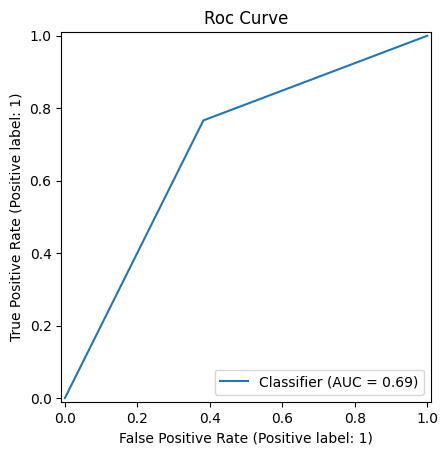

In [90]:
knn_cv, knn_test = report(knn_grid_search, X_test, y_test)
print(knn_grid_search.best_params_)


Вывод: Оптимальное значение 1 ближайший сосед.
Но даже при лучшем параметре ошибка большая.

Проблемы модели:

- Высокий False Positive (18983) - много ложных срабатываний

- Значительный False Negative (11743) - много пропущенных положительных случаев

Сильные стороны:
Хорошее количество правильных предсказаний положительного класса (23546)

Поробую другие решения для данной задачи и проведу на них так же тестовый эксперемент по подбору параметров (10)

<h3>Классификатор деревья решений<h3>

TRAIN RESULTS


,mean_fit_time,mean_score_time,param_max_depth,mean_test_precision,rank_test_precision,mean_test_recall,rank_test_recall,mean_test_f1,rank_test_f1,mean_test_roc_auc,rank_test_roc_auc
0,1.524996,0.095638,5,0.993068,8,1.000000,1,0.996522,2,0.998289,2
1,2.302572,0.108923,10,0.995039,7,0.998666,2,0.996849,1,0.999595,1
2,2.873838,0.113640,15,0.995944,6,0.996924,3,0.996434,3,0.997147,3
3,2.951324,0.106286,20,0.996045,1,0.995924,5,0.995984,5,0.996023,4
4,2.954114,0.122022,25,0.995988,5,0.995818,7,0.995903,7,0.995903,7
5,3.095934,0.106891,30,0.996005,4,0.995964,4,0.995985,4,0.995985,5
6,3.101161,0.104462,35,0.996037,2,0.995761,8,0.995899,8,0.995899,8
7,3.055862,0.108216,40,0.996021,3,0.995875,6,0.995948,6,0.995948,6


TEST RESULTS


,precision,recall,f1,roc_auc
0,0.995393,0.998601,0.996994,0.999747


{'max_depth': 10}


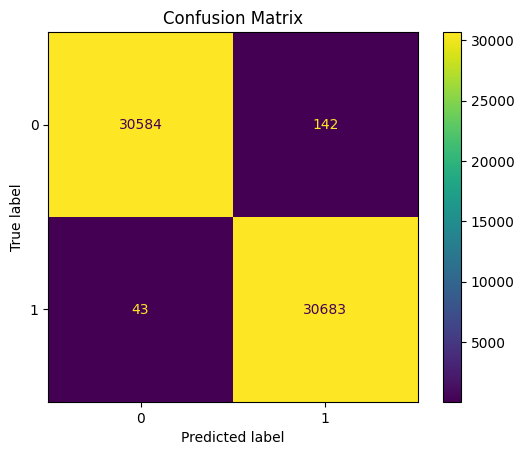

<Figure size 1500x1500 with 0 Axes>

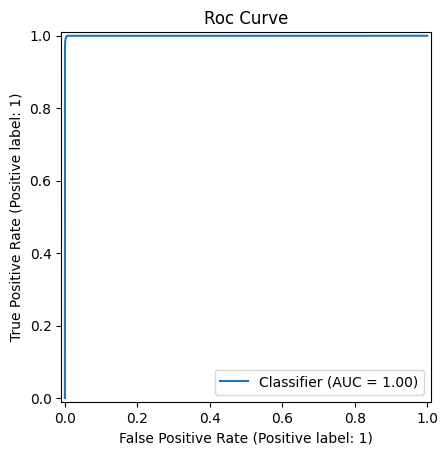

In [91]:
from sklearn.tree import DecisionTreeClassifier

param = {
    "max_depth": np.arange(5, 41, 5)
}
tree_grid_search = train(DecisionTreeClassifier(class_weight="balanced"), param, X_train, y_train)
tree_cv, tree_test = report(tree_grid_search, X_test, y_test)
print(tree_grid_search.best_params_)

<h3>Классификатор RandomForest<h3>

TRAIN RESULTS


,mean_fit_time,mean_score_time,param_max_depth,mean_test_precision,rank_test_precision,mean_test_recall,rank_test_recall,mean_test_f1,rank_test_f1,mean_test_roc_auc,rank_test_roc_auc
0,3.616227,0.267471,5,0.990181,8,0.991766,8,0.990970,8,0.999694,8
1,5.851638,0.251170,10,0.996473,7,0.995061,7,0.995766,7,0.999885,6
2,6.448621,0.310437,15,0.996490,6,0.997600,4,0.997044,6,0.999898,1
3,6.927499,0.324988,20,0.996498,5,0.997722,2,0.997109,4,0.999894,3
4,6.784188,0.300228,25,0.996579,4,0.997608,3,0.997093,5,0.999888,5
5,6.479767,0.373644,30,0.996740,2,0.997551,6,0.997145,3,0.999881,7
6,6.422151,0.322157,35,0.996748,1,0.997567,5,0.997157,2,0.999892,4
7,6.715246,0.322900,40,0.996587,3,0.997795,1,0.997191,1,0.999894,2


TEST RESULTS


,precision,recall,f1,roc_auc
0,0.996685,0.998112,0.997398,0.999922


{'max_depth': 40}


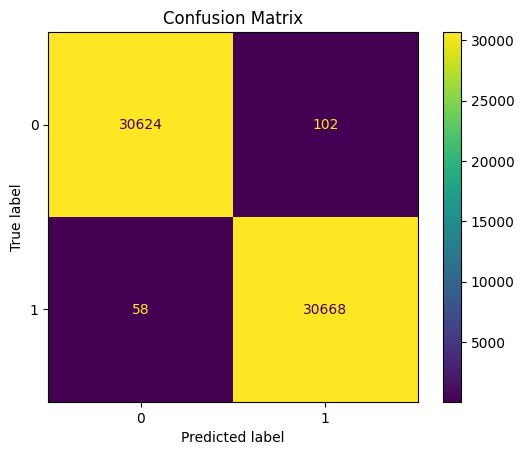

<Figure size 1500x1500 with 0 Axes>

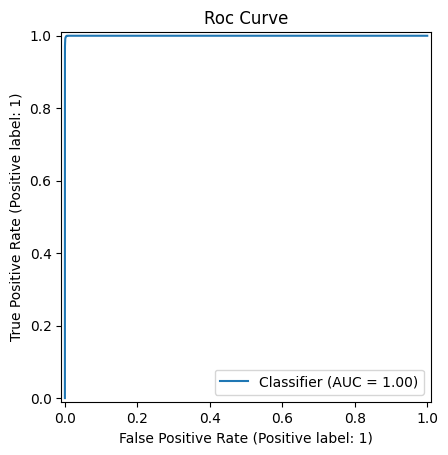

In [92]:
from sklearn.ensemble import RandomForestClassifier

aram_grid = {
    "n_models": np.arange(10, 111, 20),
    "max_depth": np.arange(30, 51, 5)
}
rf_grid_search = train(RandomForestClassifier(class_weight="balanced", n_jobs=-1), param, X_train, y_train)
rf_cv, rf_test = report(rf_grid_search, X_test, y_test)
print(rf_grid_search.best_params_)

<h3>Сравню результаты<h3>

In [ ]:
res = pd.concat([knn_test, tree_test, rf_test]).reset_index(drop=True)
res.rename({0: "kNN",1: "Tree", 2: "Forest"})

,precision,recall,f1,roc_auc
kNN,0.667233,0.766322,0.713353,0.692069
Tree,0.995393,0.998601,0.996994,0.999747
Forest,0.996685,0.998112,0.997398,0.999922


<h2>Оптимальные параметы: </h2>

  - kNN - 1 сосед;

  - tree - глубина 10;

  - Forest - глубина 35;

<h2>Вывод:</h2>
Самый лучший результат выдал классификатор RandomForest, с глубиной поиска 35. Выдавая почти точные результаты на тесте, ошибаясь только в паре вариантов.

Метод kNN показал значительно более низкие результаты по сравнению с алгоритмами на основе деревьев. И еще и намного дольше. Так как в принципе он является более простым и зато интерпритируемым решением, чем деревья или лес.

Если сравнивать алгоритмы деревьев с лесом, то ансамблевый метод (случайный лес) показал себя несколько лучше одиночного дерева. В действительности, разница в качестве между этими подходами не является значительной, поэтому в некоторых случаях может быть предпочтительнее использовать простое одиночное дерево.